In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
from wordcloud import WordCloud, STOPWORDS
nltk.download("stopwords")
stopwords_set = set(stopwords.words("english"))
%matplotlib inline
pd.options.mode.chained_assignment = None


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv("/content/Twitter_Data.csv")
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
df['category'][16089] = 1

<Axes: xlabel='category'>

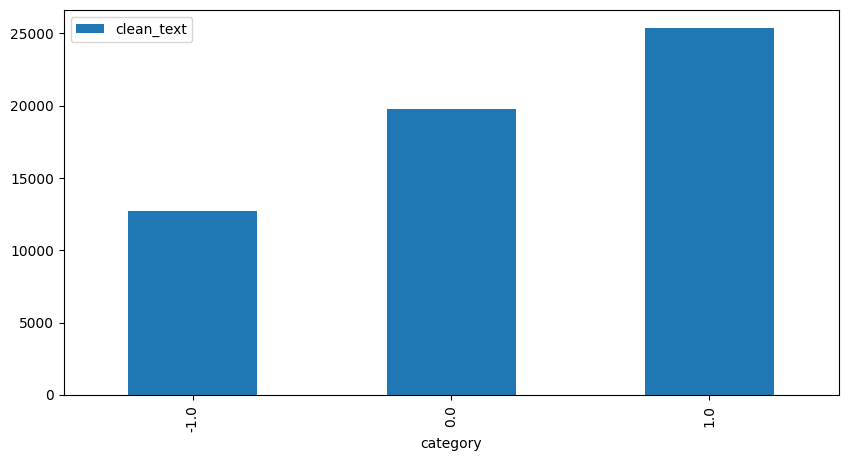

In [8]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [9]:
# Mapping tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
57848,and clarify you ardent karyakarta for trs when...,Neutral
57849,during before announced feat scientists today ...,Positive
57850,why would act helps modi,Neutral
57851,are with modi and modi with and you are useles...,Negative


In [10]:
for i in range(len(df['clean_text'])):
  item = df['clean_text'][i]
  if not (isinstance(item, str) and not pd.isnull(item)):
    df['clean_text'][i]="none"

In [11]:
#Visualizing Data using Word Cloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    #fill code
    words = ' '.join(df)
    cleaned_words = " ".join([word for word in words.split()
                              if 'http' not in word
                              and not word.startswith('@')
                              and not word.startswith("#")
                              and word != 'RT'
                              ])
    if category == 'Negative' or category == 'Neutral':
       color = 'black'
    else:
      color = 'white'

    wordcloud = WordCloud(stopwords=STOPWORDS,background_color=color,width=2500
                          ,height=2000).generate(cleaned_words)
    plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    #fill code


In [12]:
pos = [j for i , j in enumerate(df['clean_text']) if df['category'][i]== 'Positive']
neg = [j for i , j in enumerate(df['clean_text']) if df['category'][i]== 'Negative']
neutral = [j for i , j in enumerate(df['clean_text']) if df['category'][i]== 'Neutral']

Psoitive words in the Dataset


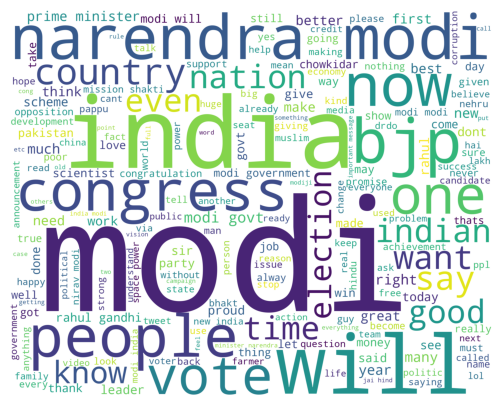

In [13]:
print("Psoitive words in the Dataset")
wordcount_gen(pos,'Positive')

Negative words in the Dataset


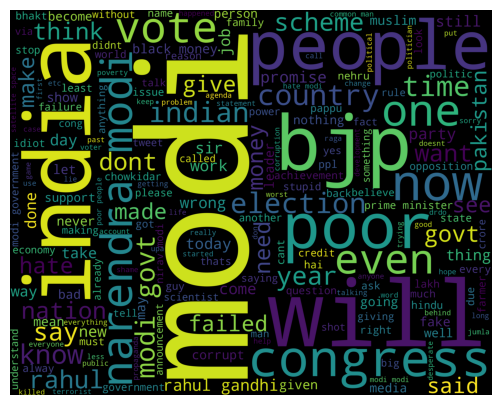

In [14]:
print("Negative words in the Dataset")
wordcount_gen(neg,'Negative')

Neutral words in the Dataset


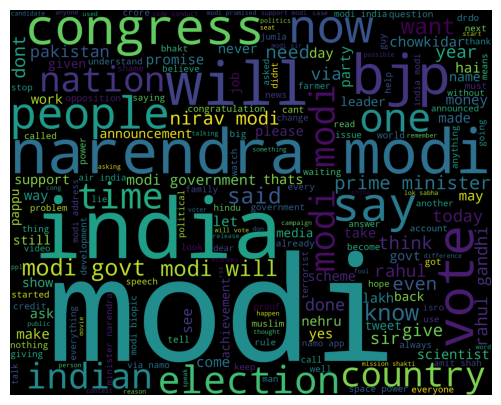

In [15]:
print("Neutral words in the Dataset")
wordcount_gen(neutral,'Neutral')

In [16]:
#Cleaning using Regex and NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
nltk.download('wordnet')

tokenizer = RegexpTokenizer(r'\w+')
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
wnet = WordNetLemmatizer()

def tweet_to_words(tweet):

  ''' Convert tweet text into a sequence of words '''
  #fill code
  text = tweet.lower()
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  lem_tokens = [wnet.lemmatize(tokens) for tokens in new_tokens]
  clean_text = " ".join(lem_tokens)
  return clean_text
  #fill code

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))

for i in range(len(df['clean_text'])):
  word = df['clean_text'][i]
  if isinstance(word,str):
    df['clean_text'][i] = tweet_to_words(word)

df


[nltk_data] Downloading package wordnet to /root/nltk_data...



Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> modi promised minimum government maximum governance expected begin difficult job reforming state take year get justice state business exit psus temple


,clean_text,category
0,modi promised minimum government maximum gover...,Negative
1,talk nonsense continue drama vote modi,Neutral
2,say vote modi welcome bjp told rahul main camp...,Positive
3,asking supporter prefix chowkidar name modi gr...,Positive
4,answer among powerful world leader today trump...,Positive
...,...,...
57848,clarify ardent karyakarta trs come country sec...,Neutral
57849,announced feat scientist today everybody specu...,Positive
57850,would act help modi,Neutral
57851,modi modi useless joker,Negative


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
tweet_sent = df['category']
label_encoder.fit(tweet_sent)
encoded_tweet_labels = label_encoder.transform(tweet_sent)
df['encoded_text'] = encoded_tweet_labels
df.head(5)

,clean_text,category,encoded_text
0,modi promised minimum government maximum gover...,Negative,0
1,talk nonsense continue drama vote modi,Neutral,1
2,say vote modi welcome bjp told rahul main camp...,Positive,2
3,asking supporter prefix chowkidar name modi gr...,Positive,2
4,answer among powerful world leader today trump...,Positive,2


In [18]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['encoded_text'], test_size=0.2, random_state=42)

In [19]:
#Transforming training and testing data using countvectroizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_data_features = vectorizer.fit_transform(X_train)
print(train_data_features.shape)

(46282, 44473)


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0,solver='lbfgs',multi_class='multinomial',max_iter=1000)
model.fit(train_data_features, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [21]:
test_data_features = vectorizer.transform(X_test)
result = model.predict(test_data_features)
y_pred = result
y_pred

array([2, 0, 1, ..., 1, 1, 1])

[[1711  383  403]
 [  80 3726  209]
 [ 197  413 4449]]


Text(0.5, 445.55555555555554, 'Predicted label')

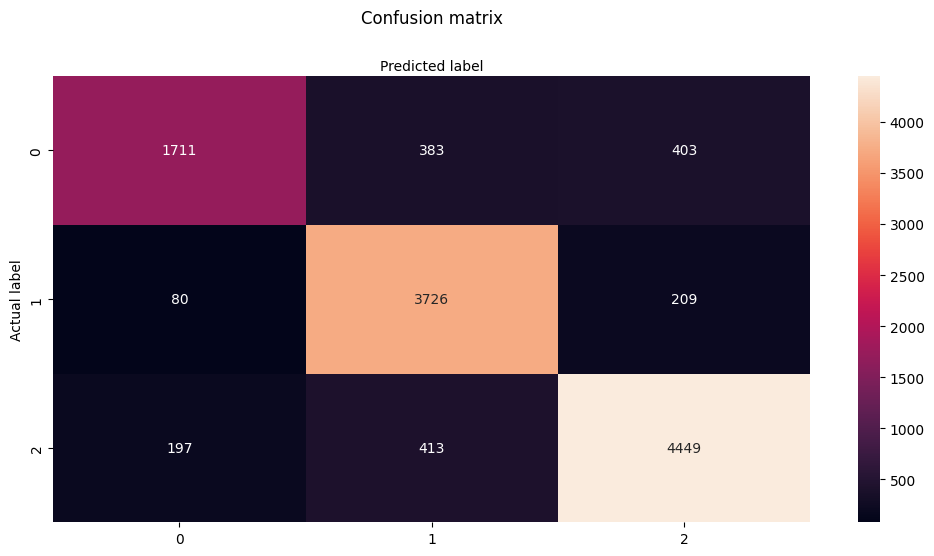

In [22]:
#Analysis Result
#Calculate and plot the Confusion matrix
#fill code
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
#Plotting
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:",recall)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Accuracy: 0.854377322616887
Recall: 0.854377322616887
Precision: 0.8559818657346608
